### Improving a Data Scientist jobs search with NLP

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/indeed_jobs.xlsx')

**Basic exploration**

In [3]:
df.shape

(637, 7)

In [4]:
df.head(5)

,Unnamed: 0,Título,Empresa,Local,Salário,Avaliação,Descrição
0,0,PESSOA CIENTISTA DE DADOS JÚNIOR,Serasa,"São Paulo, SP",Tempo integral,"4,3","Somos formados por gente inquieta, inconformad..."
1,1,Cientista de Dados,BWTECH,"Belo Horizonte, MG",NaN,NaN,Tratamento de dados em cenários de big data;\n...
2,2,Tecnologia | Cientista de Dados e Analytics,Cielo,Home office,NaN,"4,2",Ferramentas de visualização de dados - Tableau...
3,3,Cientista de Dados Jr,Maxxidata,Home office,NaN,NaN,Experiência com pipeline de dados no AWS ou GC...
4,4,Cientista de Dados I,Martins,Home office,NaN,"3,5",Conhecimento em Linguagens de programação de a...


In [5]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  637 non-null    int64 
 1   Título      637 non-null    object
 2   Empresa     637 non-null    object
 3   Local       637 non-null    object
 4   Salário     180 non-null    object
 5   Avaliação   271 non-null    object
 6   Descrição   285 non-null    object
dtypes: int64(1), object(6)
memory usage: 35.0+ KB


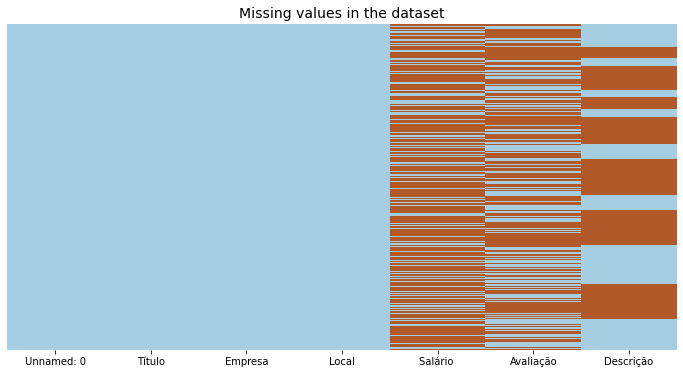

In [6]:
# check missing values of all the columns

plt.figure(figsize=(12,6))

sns.heatmap(df.isnull(), cbar=False, cmap='Paired', yticklabels=False, fmt='.1g')
plt.title('Missing values in the dataset', size=14)

plt.show()

In [7]:
# remove column=Unnamed
df = df.drop(columns=['Unnamed: 0',])

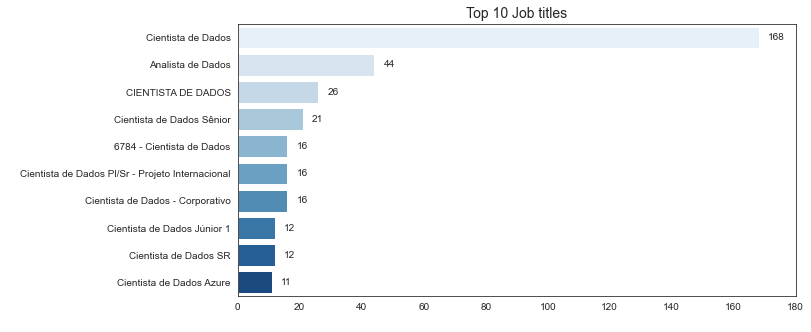

In [8]:
plt.figure(figsize=(10,5))
sns.set_style("white")
ax = sns.countplot(data=df, y='Título', palette='Blues', order=pd.value_counts(df['Título']).iloc[:10].index)

ax.set_xlabel(' ')
ax.set_ylabel(' ')

for p in ax.patches:
  height = p.get_height()
  width = p.get_width()
  ax.text(x = width+3,
  y = p.get_y()+(height/2),
  s = '{:.0f}'.format(width),
  va = 'center')

plt.xlim(0,180)
plt.title('Top 10 Job titles', size=14)

plt.show()

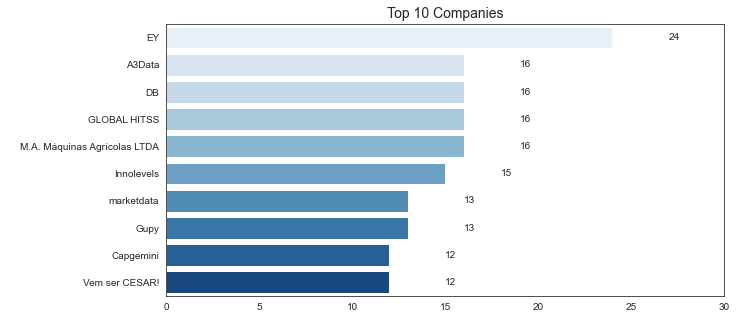

In [9]:
plt.figure(figsize=(10,5))
sns.set_style("white")
ax = sns.countplot(data=df, y='Empresa', palette='Blues', order=pd.value_counts(df['Empresa']).iloc[:10].index)

ax.set_xlabel(' ')
ax.set_ylabel(' ')

for p in ax.patches:
  height = p.get_height()
  width = p.get_width()
  ax.text(x = width+3,
  y = p.get_y()+(height/2),
  s = '{:.0f}'.format(width),
  va = 'center')

plt.xlim(0,30)
plt.title('Top 10 Companies', size=14)

plt.show()

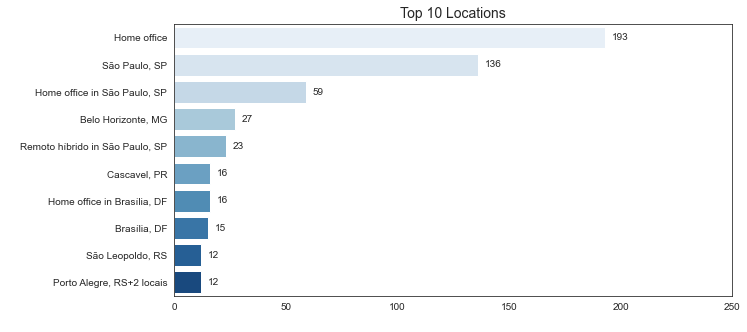

In [10]:
plt.figure(figsize=(10,5))
sns.set_style("white")
ax = sns.countplot(data=df, y='Local', palette='Blues', order=pd.value_counts(df['Local']).iloc[:10].index)

ax.set_xlabel(' ')
ax.set_ylabel(' ')

for p in ax.patches:
  height = p.get_height()
  width = p.get_width()
  ax.text(x = width+3,
  y = p.get_y()+(height/2),
  s = '{:.0f}'.format(width),
  va = 'center')

plt.xlim(0,250)
plt.title('Top 10 Locations', size=14)

plt.show()

**NLP**

In [11]:
import gensim
from gensim import corpora
import numpy as np
import tqdm
import spacy
import pt_core_news_sm
from spacy import displacy 
import warnings
import string
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import nltk
from nltk.corpus import stopwords
import pickle 
import pyLDAvis
import matplotlib.pyplot as plt
import re
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np

pyLDAvis.enable_notebook()
nltk.download('stopwords')
warnings.filterwarnings('ignore')

c:\Users\dePaulaM\AppData\Local\Programs\Python\Python310\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dePaulaM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Data cleaning

In [15]:
def pre_text_processing(corpus):
    # tokenization
    corpus_alt = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
    # lowcase 
    corpus_alt = [t.lower() for t in corpus_alt]
    # remove stopwords
    portugues_stops = stopwords.words('portuguese')
    corpus_alt = [t for t in corpus_alt if t not in portugues_stops]
    # remove punctuations
    corpus_alt = [t for t in corpus_alt if t not in string.punctuation]
    
    return corpus_alt

def calcula_embedding_frase(tokens):
    return np.mean(np.array([word_vectors[t] for t in tokens if t in word_vectors.vocab]), axis=0)

In [16]:
df2 = df.dropna(subset=['Descrição']) # drop rows that has NaN values on 'Descrição' column

In [17]:
description = df2['Descrição'].values.astype(str)

In [18]:
description_clean = [pre_text_processing(e) for e in description]

##### Bag of Words

In [19]:
dictionary = corpora.Dictionary(description_clean)

In [20]:
doc_bow = [dictionary.doc2bow(doc) for doc in description_clean]

##### LDA

In [21]:
# creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [22]:
# running and Trainign LDA model on the document term matrix
ldamodel = Lda(doc_bow, num_topics=3, id2word = dictionary, passes=1000, random_state=123, alpha='auto', per_word_topics=True)

In [23]:
ldamodel.show_topics()

[(0,
  '0.055*"dados" + 0.015*"tratamento" + 0.012*"modelos" + 0.011*"ciência" + 0.009*"conhecimento" + 0.009*"dia" + 0.009*"manipulação" + 0.009*"engenharia" + 0.009*"…" + 0.009*"experiência"'),
 (1,
  '0.051*"dados" + 0.029*"…" + 0.022*"conhecimento" + 0.016*"bi" + 0.014*"time" + 0.012*"sql" + 0.011*"experiência" + 0.010*"data" + 0.010*"python" + 0.010*"soluções"'),
 (2,
  '0.031*"…" + 0.027*"data" + 0.024*"experiência" + 0.024*"dados" + 0.016*"learning" + 0.012*"negócios" + 0.012*"ferramentas" + 0.011*"machine" + 0.011*"bi" + 0.010*"visualização"')]

##### LDAvis

In [24]:
pyLDAvis.enable_notebook()

In [25]:
LDAvis_prepared = gensimvis.prepare(ldamodel, doc_bow, dictionary)

In [26]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.028017 -0.161179       1        1  50.388087
0     -0.169182  0.058763       2        1  27.992915
2      0.141164  0.102416       3        1  21.618998, topic_info=             Term       Freq      Total Category  logprob  loglift
28     tratamento  17.000000  17.000000  Default  30.0000  30.0000
20           data  51.000000  51.000000  Default  29.0000  29.0000
103      learning  23.000000  23.000000  Default  28.0000  28.0000
39              …  92.000000  92.000000  Default  27.0000  27.0000
46    experiência  51.000000  51.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
57   conhecimento   7.299292  59.727315   Topic3  -4.7437  -0.5704
201         fazer   4.953057  10.462424   Topic3  -5.1315   0.7838
134          time   5.735137  37.288332   Topic3  -4.9849  -0.3405
171           dia   4.953057  15.399884   Topic3  -5.1315   0.3972
148    dashboards   4.953057  15.962140   Topic3  -5.1315   0.3614

[182 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
306       1  0.877383               9
196       2  0.808546  acompanhamento
367       2  0.866542     administrar
218       2  0.943920              ai
207       1  0.901764            além
...     ...       ...             ...
213       1  0.781761            área
213       2  0.240542            área
39        1  0.603637               …
39        2  0.107792               …
39        3  0.280260               …

[190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

##### Word cloud

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [28]:
cloud = " ".join(w for w in description)

In [29]:
stopwords = set(STOPWORDS)

In [38]:
stopwords.update(['o', 'os', 'e', 'é', 'da', 'de','do', 'dos', 'na', 'no', 'um','em', 'que', 'para', 'pela', 'por', 'ou', 'como', 'seu', 'sua', 'se', 'há']) # remover alguns stopwords manualmente

In [39]:
def plot_wordcloud(wc):
  fig, ax = plt.subplots(figsize=(14,7))
  ax.imshow(wc, interpolation= 'bilinear')
  ax.set_axis_off()
  plt.imshow(wc)

In [40]:
wc = WordCloud(stopwords=stopwords, background_color="white",
               random_state=42, width=1600, height=800).generate(cloud)

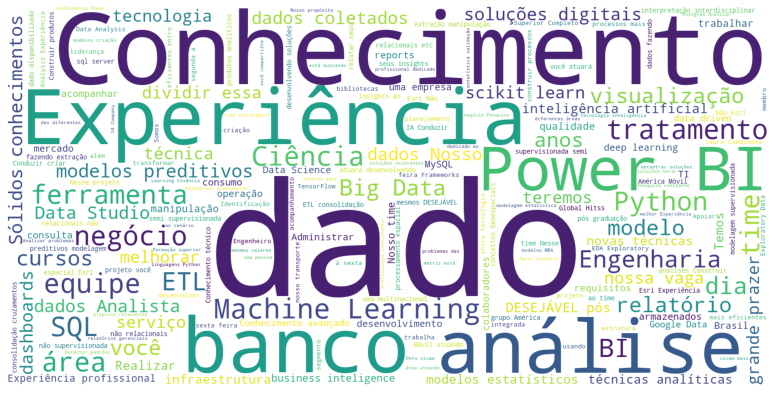

In [41]:
plot_wordcloud(wc)

**Análise de frequência**

In [42]:
import nltk
from nltk.probability import FreqDist
from unidecode import unidecode
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dePaulaM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
def pre_text_processing(corpus):
  # tokenization
  corpus_alt = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
  # lowcase
  corpus_alt = [t.lower() for t in corpus_alt]
  # remove stopwords
  portuguese_stops = stopwords.words('portuguese')
  corpus_alt = [t for t in corpus_alt if t not in portuguese_stops] 
  # remove numbers
  corpus_alt = [re.sub(r'\d', '', t) for t in corpus_alt]
  # remove punctuations
  corpus_alt = [t for t in corpus_alt if t not in string.punctuation]
  #remove accents
  corpus_alt = [unidecode(t) for t in corpus_alt]

  return corpus_alt

In [46]:
# text cleaning (using Regex)
description_clean2 = ' '.join([str(elem) for elem in description_clean])
description_clean2 = re.sub(r"[[',]", "", description_clean2) 
description_clean2 = re.sub(r"[]]", "", description_clean2) 
description_clean2 = re.sub(r"[…]", "", description_clean2) 

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dePaulaM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
words = nltk.tokenize.word_tokenize(description_clean2)

In [50]:
FreqDist(words)
fd_words = FreqDist(words)

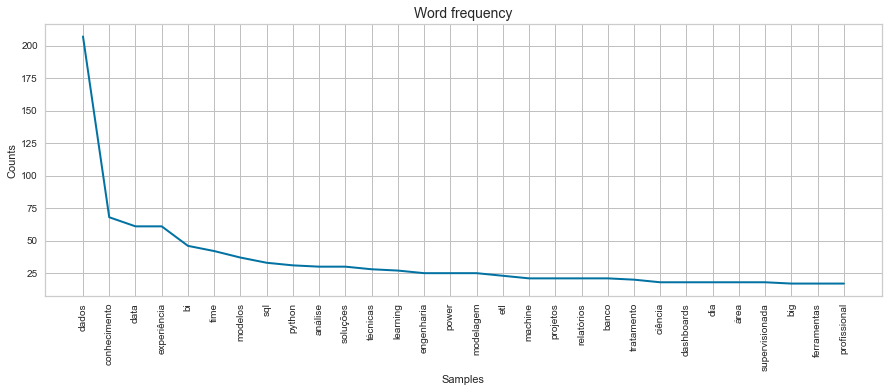

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5)) 

plt.title('Word frequency', size=14)

fd_words.plot(30)
plt.show()


In [52]:
# the 10 most common words
fd_words.most_common(10)

[('dados', 207),
 ('conhecimento', 68),
 ('data', 61),
 ('experiência', 61),
 ('bi', 46),
 ('time', 42),
 ('modelos', 37),
 ('sql', 33),
 ('python', 31),
 ('análise', 30)]